In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import psycopg2
from psycopg2 import Error

In [4]:
db_params = {
    'host': 'localhost',
    'port': '5432',
    'database': 'postgres',
    'user': 'postgres',
    'password': 'whoami'
}

try:
    connection = psycopg2.connect(**db_params)
    print("Successfully connected to the database")

    query = "SELECT * FROM cases"
    df = pd.read_sql_query(query, connection)

    df['case_created_at'] = pd.to_datetime(df['case_created_at'])

    connection.close()
    print("Database connection closed")

except Error as e:
    print(f"Error connecting to PostgreSQL: {e}")
    exit()

Successfully connected to the database
Database connection closed


/var/folders/fq/f_p95hfx63j6_m9f116tk0p40000gn/T/ipykernel_24097/1283296435.py:14: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)


In [14]:
if df.empty:
    print("No data retrieved from the database")
    exit()

df

,case_id,user_id,comment,case_created_at,case_rating,case_category_1,case_category_2
0,1,56,Nước ngon lắm,2020-01-03 20:34:00,5,Product,Drink
1,2,67,Máy lạnh nóng quá,2020-04-03 20:34:00,1,Facility,Air Conditioner
2,3,78,Bạn thu ngân rất dễ thương,2020-05-03 20:34:00,3,Service,Cashier
3,4,78,Hôm nay bánh mì mình ăn bị chua,2020-02-03 08:34:00,2,Product,Food
4,5,88,Không gian sạch sẽ,2025-07-01 10:00:00,5,Facility,Cleanliness
5,6,90,Nhân viên chậm chạp,2025-07-02 12:30:00,2,Service,Staff
6,7,77,Thức ăn rất ngon,2025-07-03 18:45:00,5,Product,Food
7,8,66,Quạt bị hỏng,2025-07-04 09:15:00,1,Facility,Fan
8,9,55,Nhạc hơi to,2025-07-05 20:00:00,3,Facility,Noise
9,10,44,Dịch vụ tuyệt vời,2025-07-06 13:30:00,5,Service,Experience


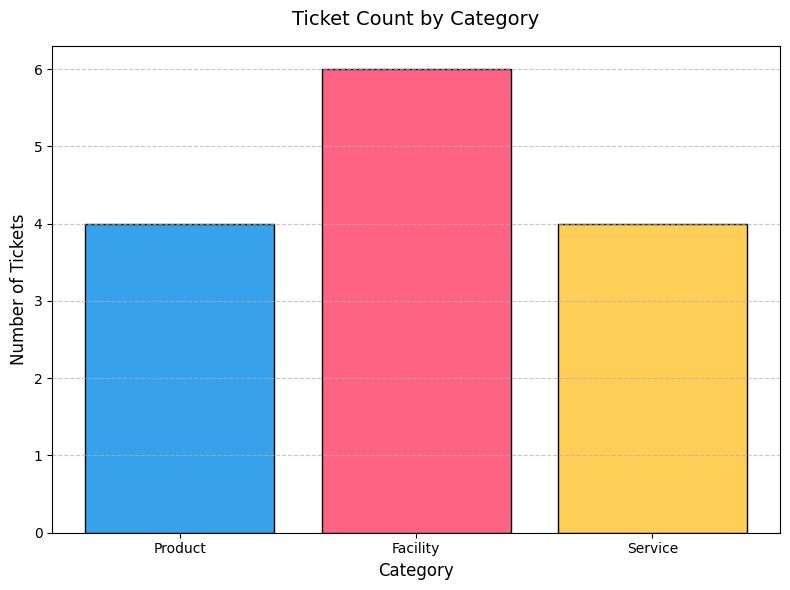

In [10]:
## Chart 1
ticket_counts = df['case_category_1'].value_counts().reindex(['Product', 'Facility', 'Service'], fill_value=0)
categories = ticket_counts.index
counts = ticket_counts.values

plt.figure(figsize=(8, 6))
plt.bar(categories, counts, color=['#36A2EB', '#FF6384', '#FFCE56'], edgecolor='black')
plt.title('Ticket Count by Category', fontsize=14, pad=15)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Number of Tickets', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

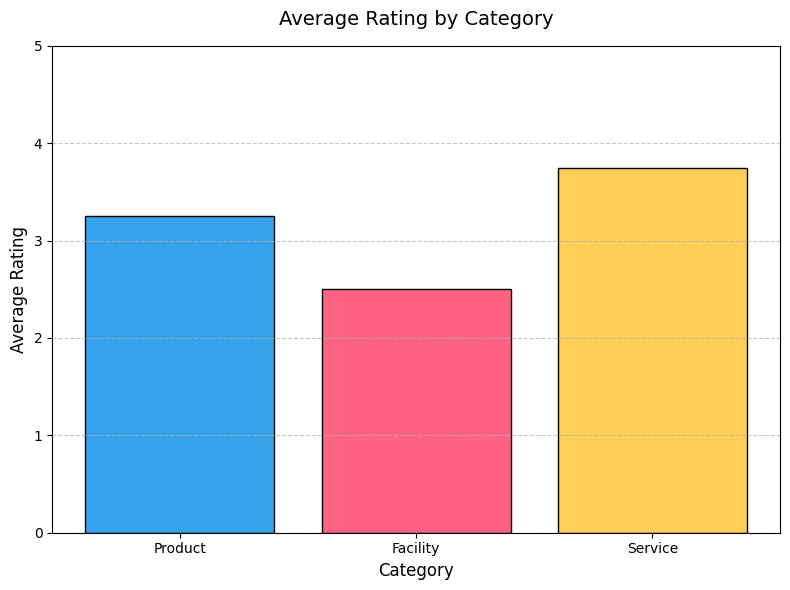

In [11]:
## Chart 2
avg_ratings = df.groupby('case_category_1')['case_rating'].mean().reindex(['Product', 'Facility', 'Service'], fill_value=0)
categories = avg_ratings.index
ratings = avg_ratings.values

plt.figure(figsize=(8, 6))
plt.bar(categories, ratings, color=['#36A2EB', '#FF6384', '#FFCE56'], edgecolor='black')
plt.title('Average Rating by Category', fontsize=14, pad=15)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Average Rating', fontsize=12)
plt.ylim(0, 5)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

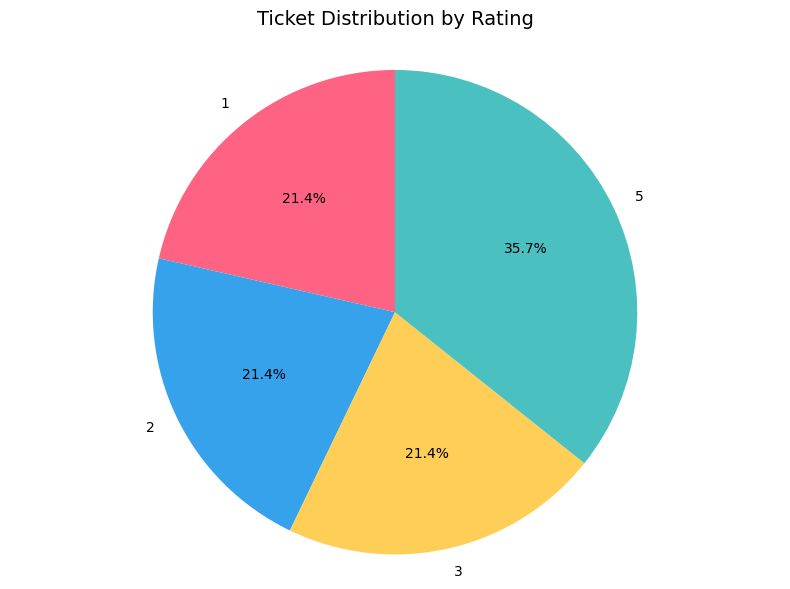

In [12]:
# Chart 3
rating_counts = df['case_rating'].value_counts().sort_index()
ratings = rating_counts.index.astype(str)
counts = rating_counts.values

plt.figure(figsize=(8, 6))
plt.pie(counts, labels=ratings, colors=['#FF6384', '#36A2EB', '#FFCE56', '#4BC0C0'], autopct='%1.1f%%', startangle=90)
plt.title('Ticket Distribution by Rating', fontsize=14, pad=15)
plt.axis('equal')
plt.tight_layout()
plt.show()